In [1]:
# csv read 및 DataFrame return

import csv
import pandas as pd

def cate(infile):

    read_file = open(infile, 'r')
    if '\0' in open(infile).read():
        read_line = csv.reader(x.replace('\0', '') for x in read_file)
    else:
        read_line = csv.reader(read_file)
    

    total_file = []

    categorical = []
    content = []

    for i in read_line:
        categorical.append(i[0])
        content.append(i[2])
    
    total_file.append(categorical)
    total_file.append(content)

    df = pd.DataFrame(total_file)
    df = df.T
    df.columns = ["label","data"]
    return df

In [2]:
# DataFrame의 "data"열 형태소 분석
from konlpy.tag import Okt

def tokeniging(df):
    okt = Okt()
        
    for n, i in enumerate(df["data"]):
        df["data"][n] = okt.nouns(i)
    
    data = df
    return data

In [3]:
# DataFrame의 "label"열 라벨링

from sklearn.preprocessing import LabelEncoder
# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 

def to_lab(df):
    encoder = LabelEncoder()
    encoder.fit(df["label"])
    labels = encoder.transform(df["label"])
    
    return labels

In [4]:
# DataFrame의 "data"열 정수 변경

from keras.preprocessing.text import Tokenizer

def to_seq(df):
    tokenizer = Tokenizer(num_words=1000)
    tokenizer.fit_on_texts(df["data"])
    sequences = tokenizer.texts_to_sequences(df["data"])
    
    return sequences

In [5]:
# 학습

from tensorflow.keras.layers import Embedding
from tensorflow.keras import preprocessing
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

def learning(X_train, Y_train):
    ####### 데이터 준비 


    max_features = 10000 # 특성으로 사용할 단어의 수
    maxlen = 20  # 사용할 텍스트의 길이(가장 빈번한 20 개의 단어만 사용합니다)

    # 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환.
    X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen) # 가장 빈번한 단어 최대 maxlen(20)개만

    ####### 모델 생성
    model = Sequential()

    # 가능한 토큰의 개수(1,0000)와 임베딩 차원(8)로 설정 
    model.add(Embedding(10000, 8, input_length=maxlen))
    # Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됨

    model.add(Flatten())  #(samples, maxlen * 8) 크기의 2D 텐서로 펼침

    # 분류기를 추가
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    #model.summary()
    ####### 학습

    history = model.fit(X_train, Y_train,
                        epochs=10,
                        batch_size=32,
                        validation_split=0.3)
    return history

In [6]:
# 학습 loss와 accuracy 시각화

import matplotlib.pyplot as plt

def visual(history):
    history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()
    
    plt.plot(history["acc"])
    plt.plot(history["val_acc"])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()

Epoch 1/10
124/124 [==============================] - 15s 8ms/step - loss: 0.6883 - acc: 0.5660 - val_loss: 0.6715 - val_acc: 0.6516
Epoch 2/10
124/124 [==============================] - 0s 4ms/step - loss: 0.6516 - acc: 0.7623 - val_loss: 0.6274 - val_acc: 0.7316
Epoch 3/10
124/124 [==============================] - 0s 2ms/step - loss: 0.5891 - acc: 0.8162 - val_loss: 0.5706 - val_acc: 0.7534
Epoch 4/10
124/124 [==============================] - 0s 2ms/step - loss: 0.5157 - acc: 0.8195 - val_loss: 0.5197 - val_acc: 0.7640
Epoch 5/10
124/124 [==============================] - 0s 2ms/step - loss: 0.4506 - acc: 0.8376 - val_loss: 0.4837 - val_acc: 0.7746
Epoch 6/10
124/124 [==============================] - 0s 2ms/step - loss: 0.4126 - acc: 0.8446 - val_loss: 0.4611 - val_acc: 0.7840
Epoch 7/10
124/124 [==============================] - 0s 2ms/step - loss: 0.3666 - acc: 0.8688 - val_loss: 0.4487 - val_acc: 0.7846
Epoch 8/10
124/124 [==============================] - 0s 2ms/step - loss: 0

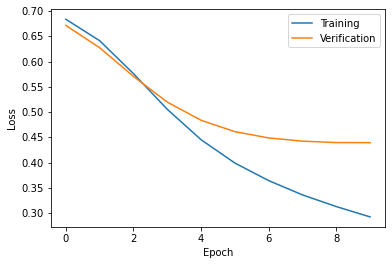

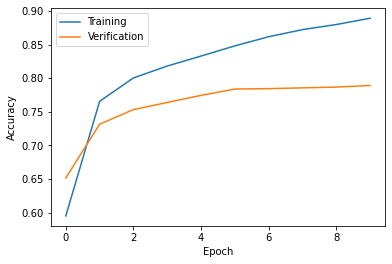

In [8]:
# 기사 형태는 0열에 "분류, 제목, 내용"이 모두 들어있어야 함

read = cate("../210716/Article_shuffled.csv")

token = tokeniging(read)

X_train = to_seq(token)
Y_train = to_lab(token)

learn = learning(X_train, Y_train)
visual(learn)

In [11]:
# 예측할 데이터 입력, 분석, 출력

def main():
    okt = Okt()
    tokenizer = Tokenizer(num_words=1000)
    max_features = 10000 # 특성으로 사용할 단어의 수
    maxlen = 20  # 사용할 텍스트의 길이(가장 빈번한 20 개의 단어만 사용합니다)
    
    ####### 모델 생성
    model = Sequential()

    # 가능한 토큰의 개수(1,0000)와 임베딩 차원(8)로 설정 
    model.add(Embedding(10000, 8, input_length=maxlen))
    # Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됨

    model.add(Flatten())  #(samples, maxlen * 8) 크기의 2D 텐서로 펼침

    # 분류기를 추가
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    
    news_input = [input("기사 입력> ")]
    print(news_input)
    news_title = [okt.nouns(news_input[0])]
    
    tokenizer.fit_on_texts(news_title)

    n_sequences = tokenizer.texts_to_sequences(news_title)

    nt_data = preprocessing.sequence.pad_sequences(n_sequences, maxlen=maxlen)
    
    atc_result = model.predict(nt_data,batch_size=32)

    if atc_result > 0.5:
        print("IT과학,", "embd = ", atc_result)
    else:
        print("경제,", "embd = ", atc_result)

In [12]:
# 실행
if __name__ == "__main__":
    main()

['미국 금융당국이 가상화폐 시장에 대한 규제 강도를 높이기 시작했다. 달러와 연동되는 스테이블코인이 규제 사각지대에 놓여 있다는 지적에 미 금융당국도 움직이는 모양새다.  지난 17일(현지시간) 미 월스트리트저널(WSJ)에 따르면 재닛 옐런 재무장관은 19일(현지시간) 대통령 직속 금융시장실무그룹(PWG)을 소집해 스테이블코인의 시장 영향력과 관련 규제를 논의할 예정이다. 회의엔 연방준비제도(Fed), 증권거래위원회(SEC), 상품선물거래위원회(CFTC)의 각 위원장도 참석하기로 했다.  달러·유로 등 주요국 통화와 연동되는 가상화폐인 스테이블코인은 변동성이 심하지 않다. 이에 스테이블코인은 가상화폐 파생상품 시장에서 담보로 사용되는 등 가치가 안정적인 것으로 평가 받는다.  하지만 규제 사각지대에 놓여 투자자들이 손실을 입을 수 있다는 지적이 나왔다. 한 번에 많은 인원이 스테이블코인과 연동된 달러 인출을 시도하면 뱅크런과 같은 지불 불능 상태에 빠질 수 있다는 것이다. 현재 테더 등 스테이블코인 업체 측은 보유하고 있는 달러를 어떻게 관리해야 하는지 명확하게 규제되지 않은 상황이다. 2019년 해외 가상화폐 거래소 비트파이넥스는 고객 자산 손실을 숨기기 위해 테더에 예치된 8억5000만달러(약 9749억원)를 지원 받아 사용한 바 있다.']
경제, embd =  [[0.4979554]]
